In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
print('hello thesis')

"""
# Objective #1 - compare pso and hsa
# Objective #2 - compare all randpso and compare one greedy pso
# Objective #3 - compare pso and better epso

Convergence Speed
Space Complexity
Success

CSV
	Problem Identifier
	set - check
	size - check
	seed - check
	
	solarray - check 
	solvalue - check
	solweight - check
	
	obj 1 Convergence Speed
	best_SolutionPerIteration: best_SolutionPerIteration - check
	Time Complexity - eTime - check
	
	obj 2
	Memory (KB) - Space Complexity - check
	
	obj 3 
	decrepancy - check
	sucess Rate (sol/opti) * 100 - check

Convergence Speed 
	get best value per iteration - check
	get where solution flattens - evaluate - could be done in jupyter notebook - where solution stalls
		get mean or avg solution to essentially determine if it still finds another solution
Memory Complexity - Completed
	using tracemalloc - check
Sucess Rate 
	algo / prob - check
"""


hello thesis


'\n# Objective #1 - compare pso and hsa\n# Objective #2 - compare all randpso and compare one greedy pso\n# Objective #3 - compare pso and better epso\n\nConvergence Speed\nSpace Complexity\nSuccess\n\nCSV\n\tProblem Identifier\n\tset - check\n\tsize - check\n\tseed - check\n\n\tsolarray - check \n\tsolvalue - check\n\tsolweight - check\n\n\tobj 1 Convergence Speed\n\tbest_SolutionPerIteration: best_SolutionPerIteration - check\n\tTime Complexity - eTime - check\n\n\tobj 2\n\tMemory (KB) - Space Complexity - check\n\n\tobj 3 \n\tdecrepancy - check\n\tsucess Rate (sol/opti) * 100 - check\n\nConvergence Speed \n\tget best value per iteration - check\n\tget where solution flattens - evaluate - could be done in jupyter notebook - where solution stalls\n\t\tget mean or avg solution to essentially determine if it still finds another solution\nMemory Complexity - Completed\n\tusing tracemalloc - check\nSucess Rate \n\talgo / prob - check\n'

In [2]:
table_pso_hsa = pd.read_csv('293s_20p_100i_hsa&pso_output.csv')
table_epso_allrand = pd.read_csv('293s_20p_100i_epso_randALL_output.csv')
table_epso_onegreedy = pd.read_csv('293s_20p_100i_epso_rand&1Greedy_output.csv')

table_pso_hsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   seed                       36 non-null     int64  
 1   set                        36 non-null     int64  
 2   size                       36 non-null     int64  
 3   algo                       36 non-null     object 
 4   n                          36 non-null     int64  
 5   iterations                 36 non-null     int64  
 6   numberIterations           36 non-null     int64  
 7   solArray                   36 non-null     object 
 8   solValue                   36 non-null     int64  
 9   solWeight                  36 non-null     int64  
 10  greedy_solValue            36 non-null     int64  
 11  best_SolutionPerIteration  36 non-null     object 
 12  runTime                    36 non-null     float64
 13  memoryPeak                 36 non-null     float64
 

In [3]:
ast_native = ['solArray', 'best_SolutionPerIteration', 'decrepancy']

for change in ast_native:
	table_pso_hsa.loc[:, change] = table_pso_hsa[change].map(lambda x: ast.literal_eval(x))
	table_epso_allrand.loc[:, change] =  table_epso_allrand[change].map(lambda x: ast.literal_eval(x))
	table_epso_onegreedy.loc[:, change] = table_epso_onegreedy[change].map(lambda x: ast.literal_eval(x))

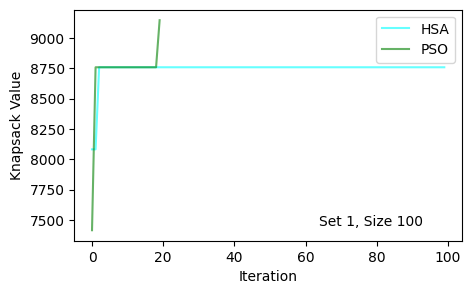

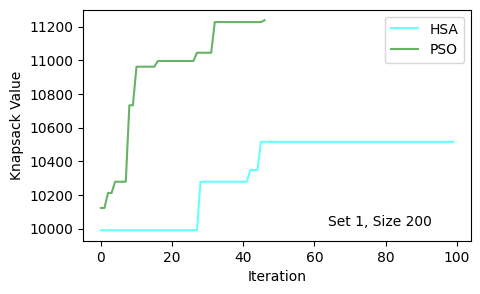

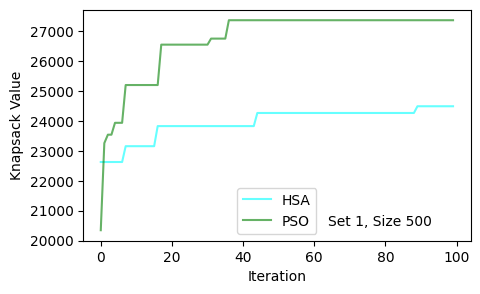

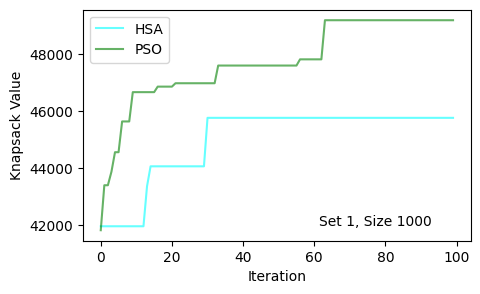

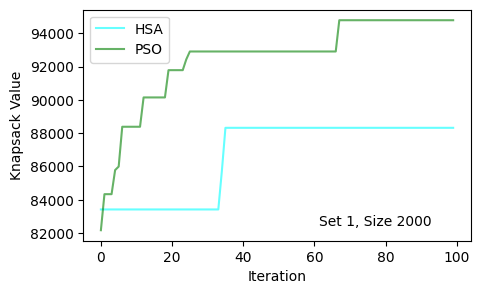

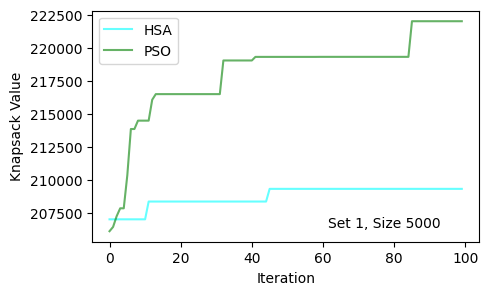

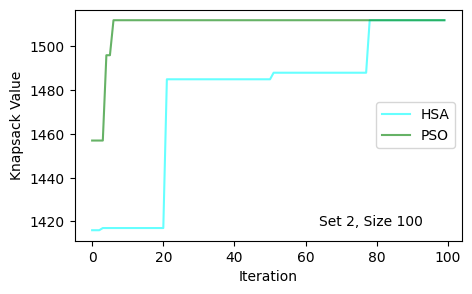

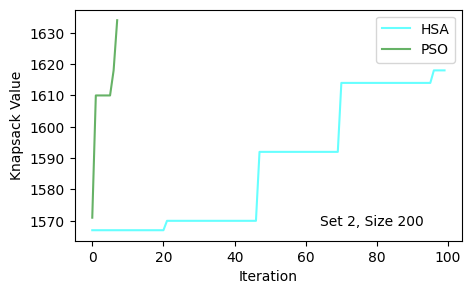

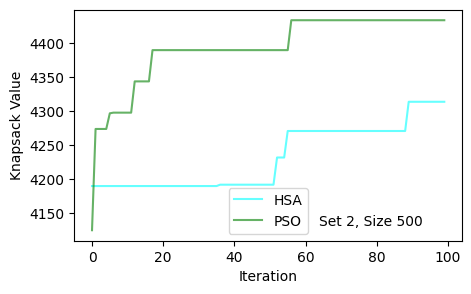

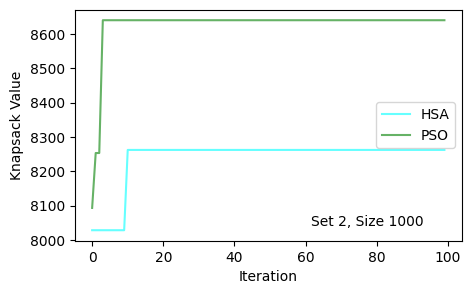

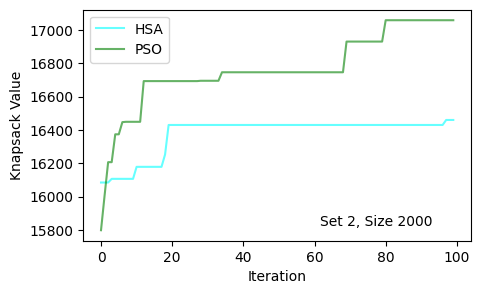

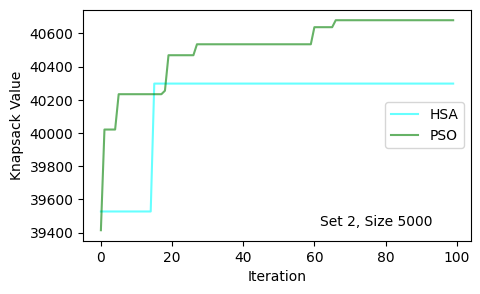

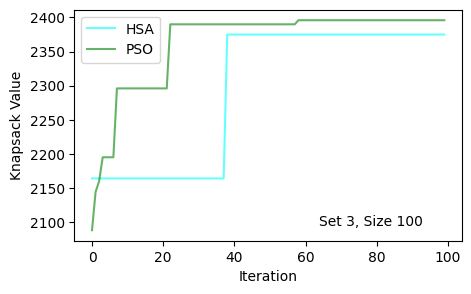

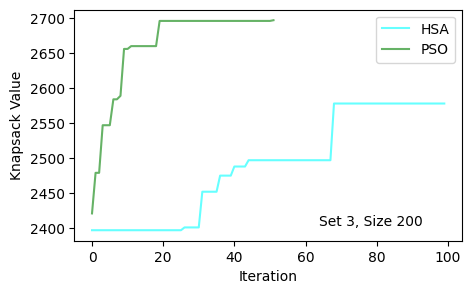

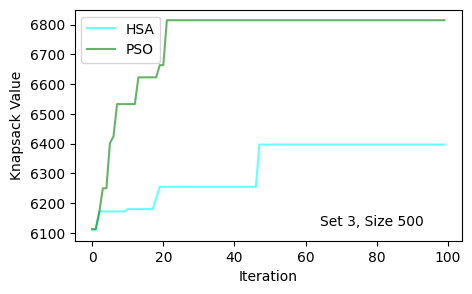

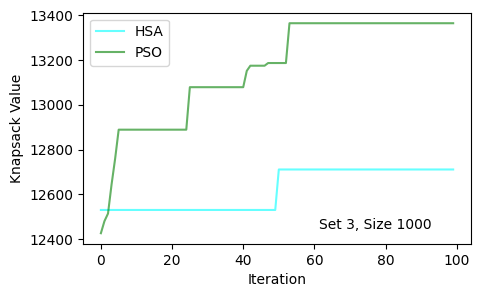

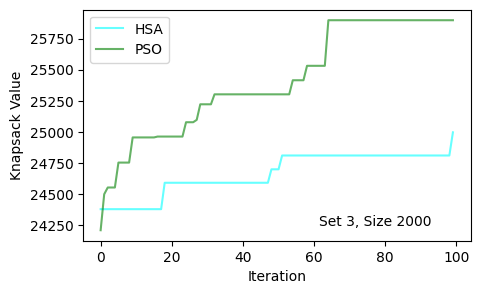

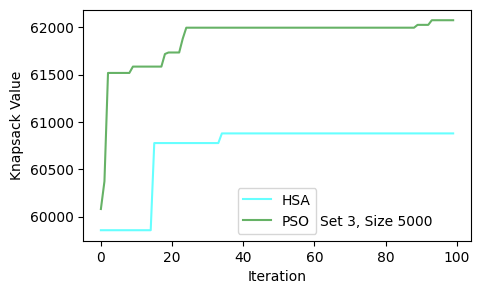

In [4]:
# Objective #1 - compare pso and hsa
# Convergence Speed
# Success Rate / Optimality Rate

table_convergenceSpeed_obj1 = table_pso_hsa[['set', 'size', 'algo', 'best_SolutionPerIteration']]

sets = [1, 2, 3]
sizes = [100, 200, 500, 1000, 2000, 5000]
algo = ['hsa', 'pso']

for set in sets:
	for size in sizes:
		graphtable = table_convergenceSpeed_obj1.loc[(table_convergenceSpeed_obj1['set'] == set) & (table_convergenceSpeed_obj1['size'] == size)]
		# fig = plt.figure()
		fig, ax = plt.subplots(figsize=(5,3))
  
		for a in algo:
			graph_algo = graphtable.loc[graphtable['algo'] == a]
			# print(graph_algo)
			graph = graph_algo.iloc[0]['best_SolutionPerIteration']
			length = len(graph)
			# print(graph)
			if a == 'hsa':
				plt.plot(range(length), graph, linestyle='-', color='cyan', label='HSA', alpha=0.6)
			if a == 'pso':
				plt.plot(range(length), graph, linestyle='-', color='green', label='PSO', alpha=0.6)

		problem = f'Set {set}, Size {size}'

		plt.ylabel('Knapsack Value')
		plt.xlabel('Iteration')
		plt.text(0.90, 0.05, problem, horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
		plt.legend()
		plt.show()

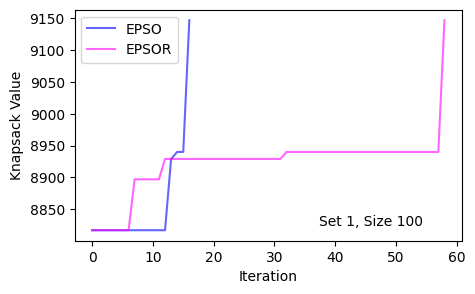

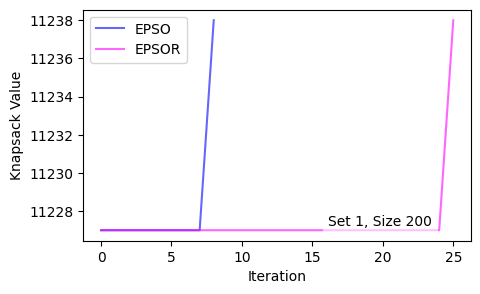

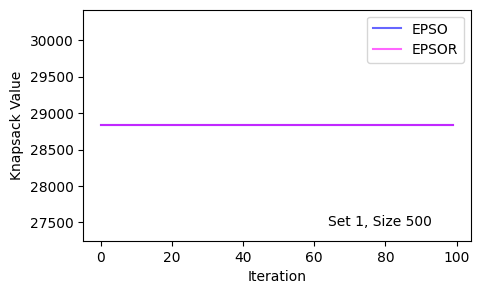

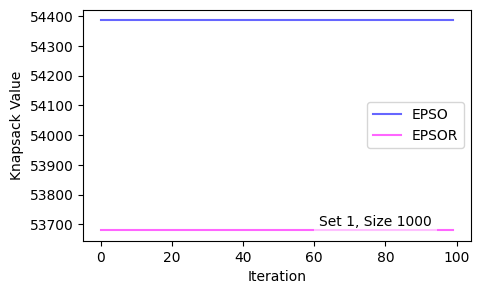

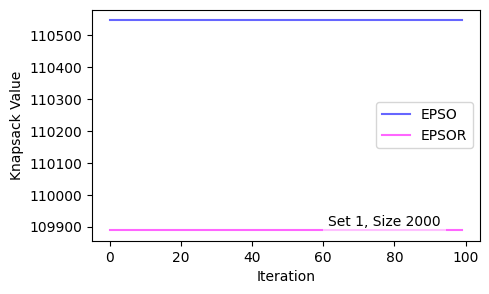

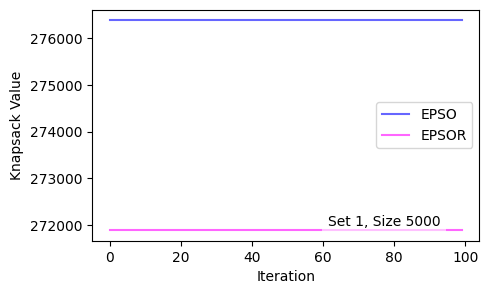

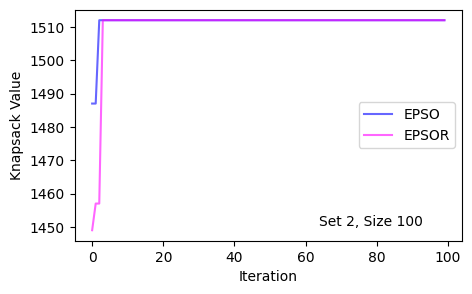

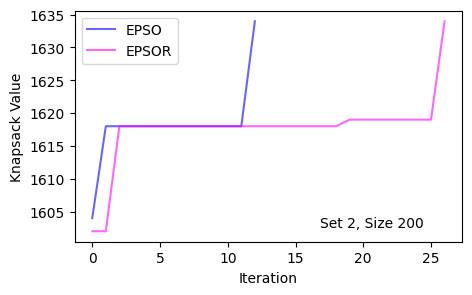

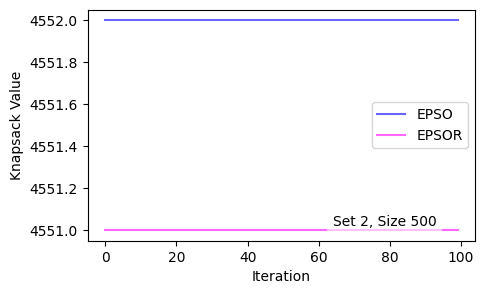

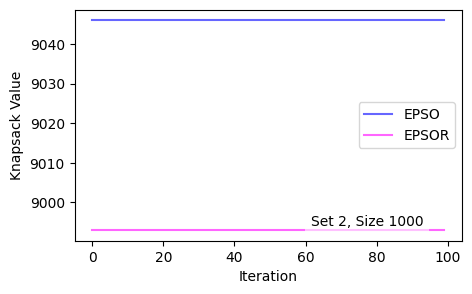

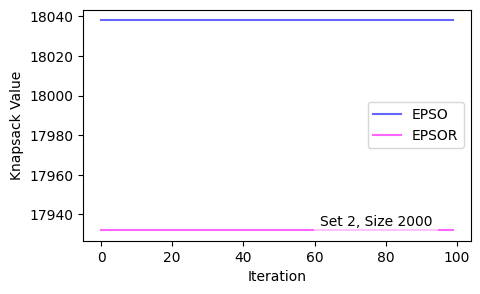

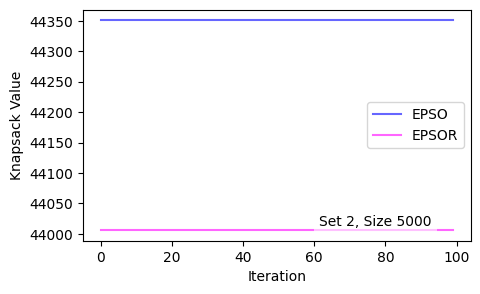

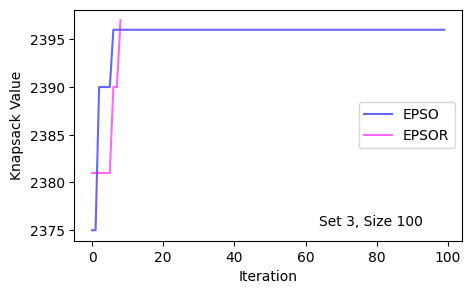

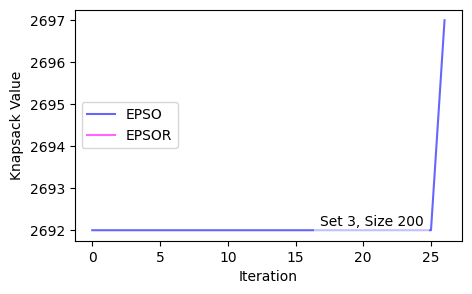

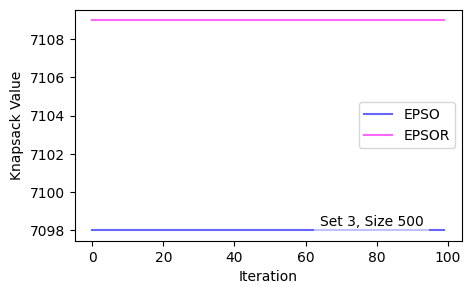

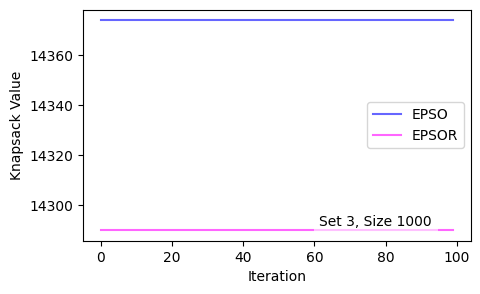

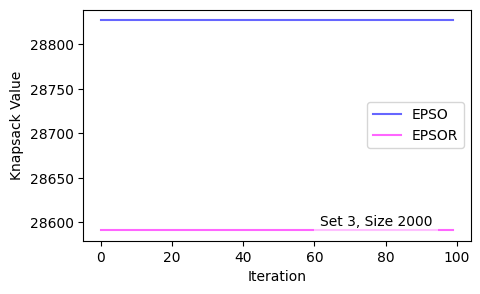

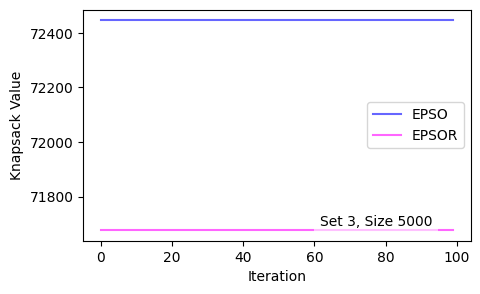

In [5]:
# Objective #2 - compare epso and epsor
# Convergence Speed
# Success Rate / Optimality Rate

table_convergenceSpeed_epsor_obj2 = table_epso_allrand[['set', 'size', 'algo', 'best_SolutionPerIteration']]
table_convergenceSpeed_epso_obj2 = table_epso_onegreedy[['set', 'size', 'algo', 'best_SolutionPerIteration']]

sets = [1, 2, 3]
sizes = [100, 200, 500, 1000, 2000, 5000]

for set in sets:
	for size in sizes:
		graphtable_epso = table_convergenceSpeed_epso_obj2.loc[(table_convergenceSpeed_epso_obj2['set'] == set) & (table_convergenceSpeed_epso_obj2['size'] == size)]
		graph_epso = graphtable_epso.iloc[0]['best_SolutionPerIteration']
		length_epso = len(graph_epso)

		graphtable_epsor = table_convergenceSpeed_epsor_obj2.loc[(table_convergenceSpeed_epsor_obj2['set'] == set) & (table_convergenceSpeed_epsor_obj2['size'] == size)]
		graph_epsor = graphtable_epsor.iloc[0]['best_SolutionPerIteration']
		length_epsor = len(graph_epsor)

		# fig = plt.figure()
		fig, ax = plt.subplots(figsize=(5,3))
		plt.plot(range(length_epso), graph_epso, linestyle='-', color='blue', label='EPSO', alpha=0.6)	
		plt.plot(range(length_epsor), graph_epsor, linestyle='-', color='magenta', label='EPSOR', alpha=0.6)

		problem = f'Set {set}, Size {size}'

		plt.ylabel('Knapsack Value')
		plt.xlabel('Iteration')
		plt.text(0.90, 0.05, problem, horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
		plt.legend()
		plt.show()

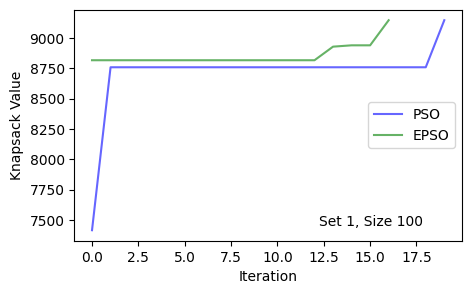

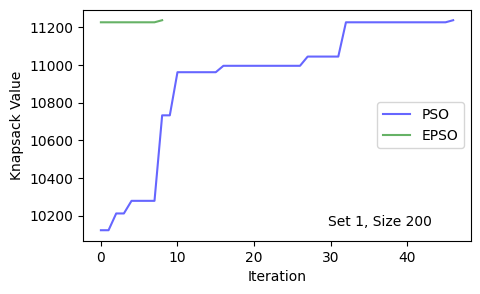

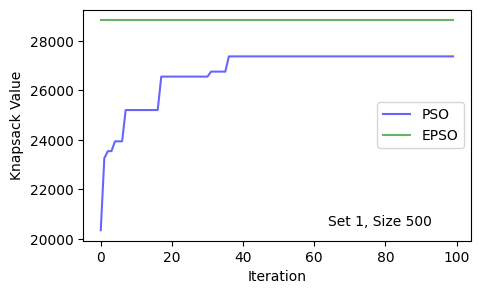

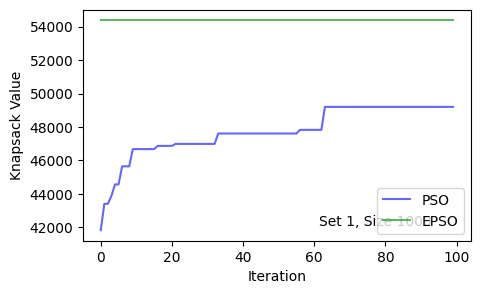

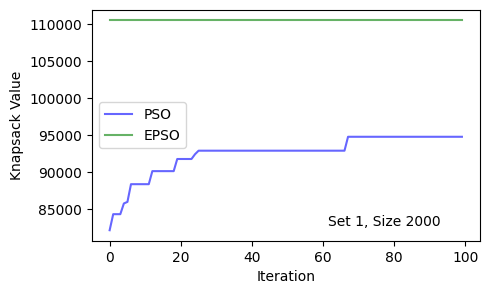

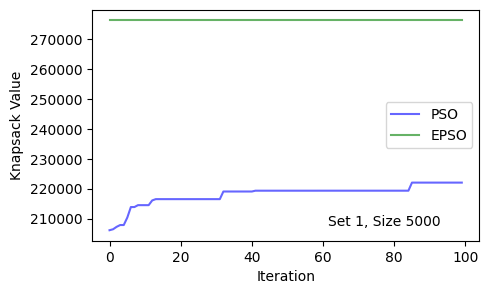

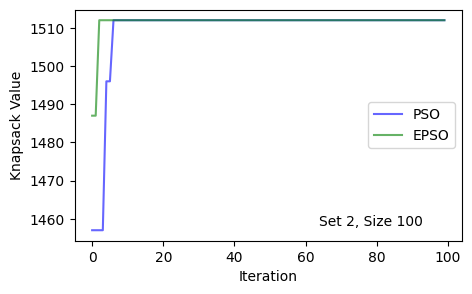

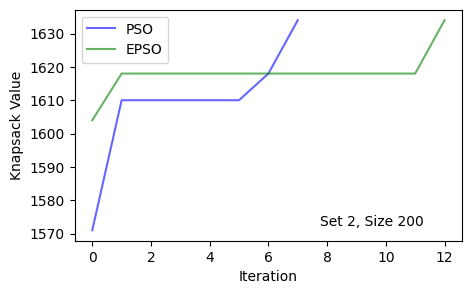

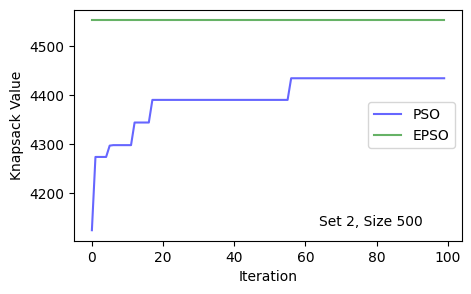

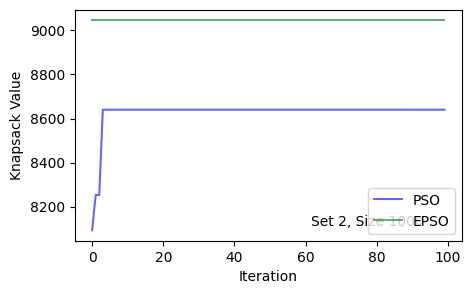

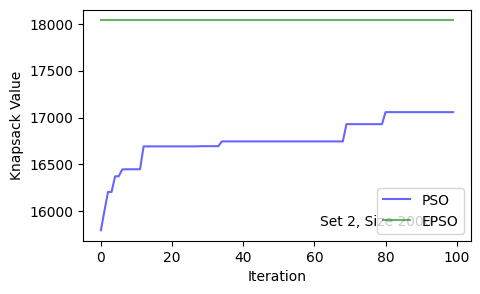

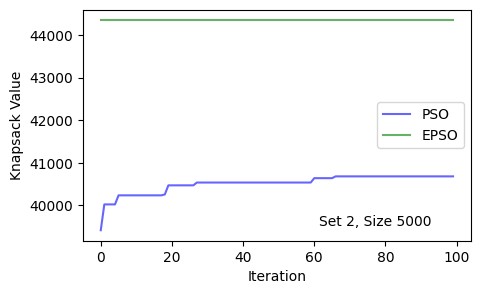

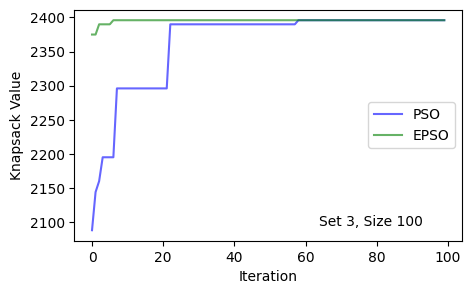

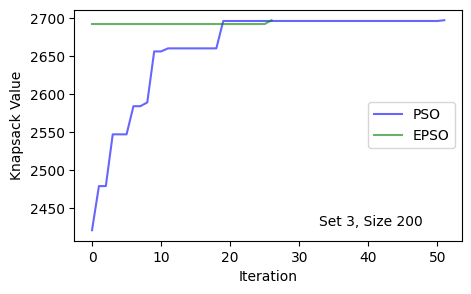

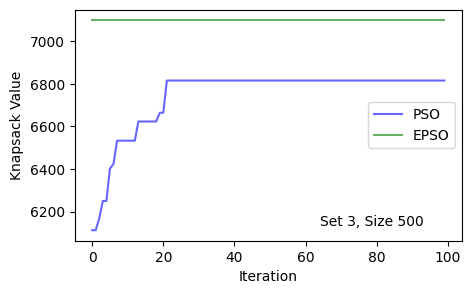

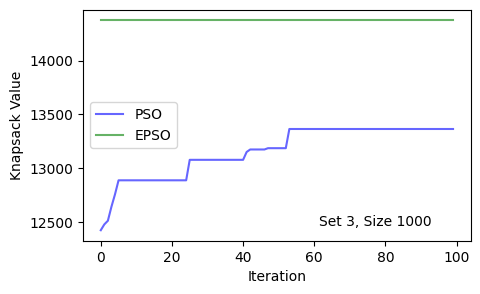

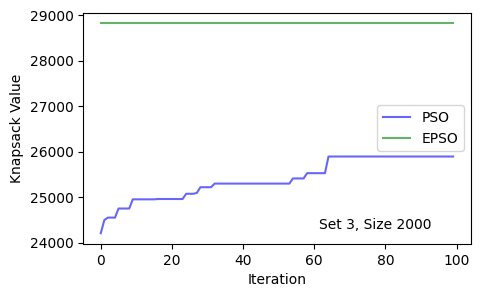

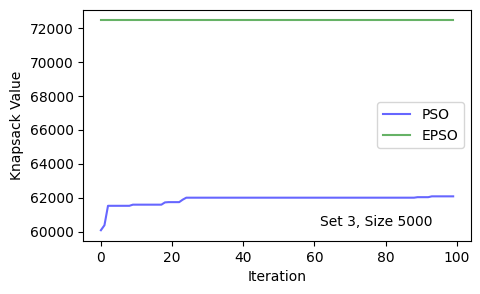

In [6]:
# Objective #3 - compare pso and epso
# Convergence Speed
# Success Rate / Optimality Rate

table_convergenceSpeed_pso_obj3 = table_pso_hsa[['set', 'size', 'algo', 'best_SolutionPerIteration']]
table_convergenceSpeed_epso_obj3 = table_epso_onegreedy[['set', 'size', 'algo', 'best_SolutionPerIteration']]

sets = [1, 2, 3]
sizes = [100, 200, 500, 1000, 2000, 5000]

for set in sets:
	for size in sizes:
		graphtable_pso = table_convergenceSpeed_pso_obj3.loc[(table_convergenceSpeed_pso_obj3['set'] == set) & (table_convergenceSpeed_pso_obj3['size'] == size) & (table_convergenceSpeed_pso_obj3['algo'] == 'pso')]
		graph_pso = graphtable_pso.iloc[0]['best_SolutionPerIteration']
		length_pso = len(graph_pso)
  
		graphtable_epso = table_convergenceSpeed_epso_obj3.loc[(table_convergenceSpeed_epso_obj3['set'] == set) & (table_convergenceSpeed_epso_obj3['size'] == size)]
		graph_epso = graphtable_epso.iloc[0]['best_SolutionPerIteration']
		length_epso = len(graph_epso)
  
		# fig = plt.figure()
		fig, ax = plt.subplots(figsize=(5,3))
		plt.plot(range(length_pso), graph_pso, linestyle='-', color='blue', label='PSO', alpha=0.6)
		plt.plot(range(length_epso), graph_epso, linestyle='-', color='green', label='EPSO', alpha=0.6)	

		problem = f'Set {set}, Size {size}'

		plt.ylabel('Knapsack Value')
		plt.xlabel('Iteration')
		plt.text(0.90, 0.05, problem, horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
		plt.legend()
		plt.show()